<a href="https://colab.research.google.com/github/VaishnavSankar/IoT-based-road-safety-device/blob/main/IIT_Bomb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score
from google.colab import drive

In [ ]:
train_dir = '/content/drive/MyDrive/Datasetf/Train'
test_dir = '/content/drive/MyDrive/Datasetf/Test'

In [ ]:
# ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load training and testing data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=32, class_mode='binary')

Found 17483 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [ ]:
# Visualize some sample images
def plot_sample_images(generator, classes):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(classes[int(labels[i])])
        plt.axis('off')
    plt.show()

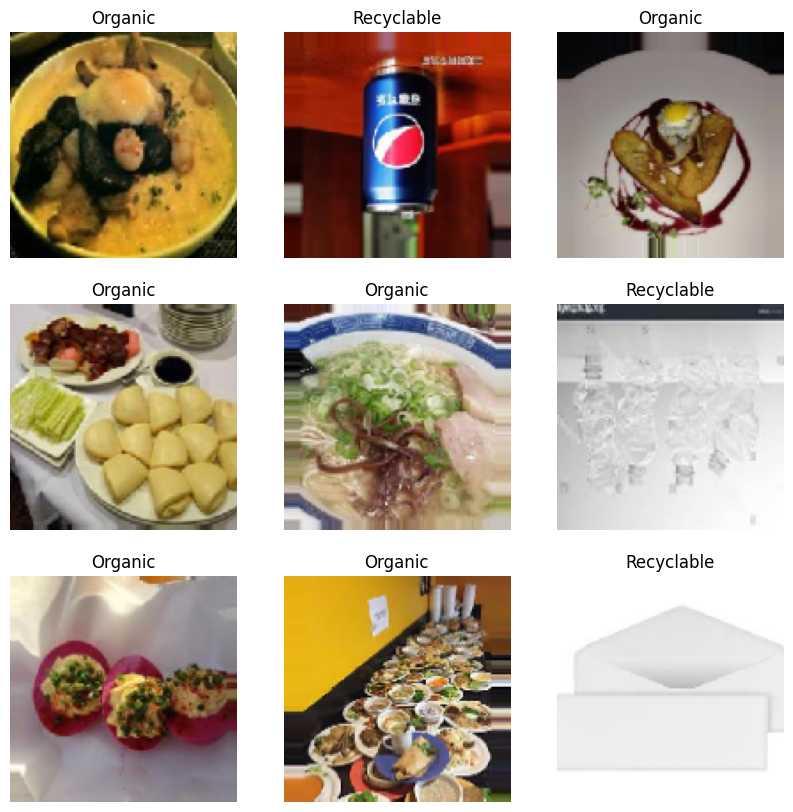

In [ ]:
plot_sample_images(train_generator, ['Organic', 'Recyclable'])

In [ ]:
# CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32
)

Epoch 1/30
546/546 [==============================] - 6541s 12s/step - loss: 0.3668 - accuracy: 0.8472 - val_loss: 0.2669 - val_accuracy: 0.8897
Epoch 2/30
546/546 [==============================] - 144s 263ms/step - loss: 0.2919 - accuracy: 0.8827 - val_loss: 0.2646 - val_accuracy: 0.8917
Epoch 3/30
546/546 [==============================] - 144s 263ms/step - loss: 0.2721 - accuracy: 0.8910 - val_loss: 0.2883 - val_accuracy: 0.8842
Epoch 4/30
546/546 [==============================] - 144s 263ms/step - loss: 0.2563 - accuracy: 0.8995 - val_loss: 0.3745 - val_accuracy: 0.8374
Epoch 5/30
546/546 [==============================] - 143s 261ms/step - loss: 0.2479 - accuracy: 0.8984 - val_loss: 0.3540 - val_accuracy: 0.8610
Epoch 6/30
546/546 [==============================] - 143s 261ms/step - loss: 0.2392 - accuracy: 0.9050 - val_loss: 0.2771 - val_accuracy: 0.8912
Epoch 7/30
546/546 [==============================] - 143s 261ms/step - loss: 0.2339 - accuracy: 0.9103 - val_loss: 0.3237 - 

In [ ]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

188/188 [==============================] - 20s 103ms/step - loss: 0.3124 - accuracy: 0.9213
Test Accuracy: 0.9213333129882812


In [ ]:
# Predict on the test data
y_pred = model.predict(test_generator, verbose=1)
y_pred_class = (y_pred > 0.5).astype(int)
y_true = test_generator.classes

188/188 [==============================] - 19s 101ms/step


In [ ]:
# Calculate evaluation metrics
f1 = f1_score(y_true, y_pred_class)
precision = precision_score(y_true, y_pred_class)
accuracy = accuracy_score(y_true, y_pred_class)
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_true, y_pred_class, target_names=['Organic', 'Recyclable']))

F1 Score: 0.5095520421607378
Precision: 0.5035807291666666
Accuracy: 0.5036666666666667
              precision    recall  f1-score   support

     Organic       0.50      0.49      0.50      3000
  Recyclable       0.50      0.52      0.51      3000

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000



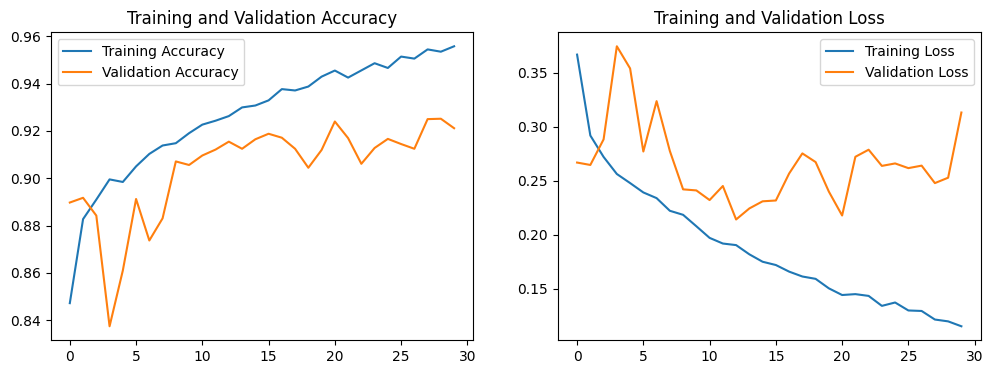

In [ ]:
# Plot training and validation accuracy and loss
def plot_performance(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_performance(history)

In [ ]:
# Step 7: Predicting new user-uploaded test image
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_waste(image_path, model):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    if prediction > 0.5:
        return 'Recyclable'
    else:
        return 'Organic'

# Example of user-uploaded image
user_test_image = 'img4.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = '1.jpg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 'P23.jpeg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = 'W22.jpeg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')
user_test_image = '2.jpeg'
result = predict_waste(user_test_image, model)
print(f'The predicted class is: {result}')

1/1 [==============================] - 0s 30ms/step
The predicted class is: Recyclable
1/1 [==============================] - 0s 29ms/step
The predicted class is: Recyclable
1/1 [==============================] - 0s 28ms/step
The predicted class is: Recyclable
1/1 [==============================] - 0s 27ms/step
The predicted class is: Recyclable
1/1 [==============================] - 0s 29ms/step
The predicted class is: Organic
